In [61]:
import numpy as np
import math

In [62]:
class RCA():
    @staticmethod
    def reverse(index,n):
        '''
        make n into bit reversal order
        '''
        tmp=format (index,'b')
        tmp=tmp.zfill(n+1)[:0:-1]
        res=int(tmp,2) 
        return res

In [63]:
class RCA(RCA):
    @staticmethod
    def indices_of_elements(v,l):
        tmp=np.argsort(v)
        res=tmp[0:l]
        return res

In [64]:
class RCA(RCA):
    def main_const(self,N,K,design_SNR,M):
        '''
        design_SNR:EsNodB
        '''
        #design SNRが複数あるかどうか判定する
        if type(design_SNR).__module__ != np.__name__:
            design_SNR=design_SNR*np.ones(N)
        elif len(design_SNR)!=N:
            print("design_SNR_len_error!")
        
        xi_dB=np.log(design_SNR)
        
        if M=2:#BPSK modulation
            xi=10**(xi_dB/10)
        elif M=4#QAM modulation
            xi=
        
        n=int(math.log2(N))
        for i in range(1,n+1):
            J=2**i
            for k in range(0,int(N/J)-1):
                for j in range(0,int(J/2)-1):
                    xi0=xi[k*J+j]
                    xi1=xi[k*J+j+int(J/2)] 
                    lambda0=calc_lambda(xi0)
                    lambda1=calc_lambda(xi1)
                    xi[k*J+j]=calc_lambda(max(lambda0,lambda1)+math.log(1+math.exp(-1*abs(lambda0-lambda1))))
                    xi[k*J+j+int(J/2)]=max(xi0,xi1)+math.log(1+math.exp(-1*abs(xi0-xi1)))
        #return xi
    
        tmp=self.indices_of_elements(xi,N)
        frozen_bits=np.sort(tmp[:N-K])
        info_bits=np.sort(tmp[N-K:])
        
        #bit reversal order
        for i in range(len(frozen_bits)):
            frozen_bits[i]=self.reverse(frozen_bits[i],n)
        frozen_bits=np.sort(frozen_bits)
            
        for i in range(len(info_bits)):
            info_bits[i]=self.reverse(info_bits[i],n)
        info_bits=np.sort(info_bits)
        
        return frozen_bits,info_bits

In [65]:
class RCA(RCA):
    @staticmethod
    def calc_lambda(xi):
        Alpha=1.16125
        Gamma1=0.04
        Gamma2=1
        Gamma3=10
        Xi0=-11.3143
        C1=0.55523
        C2=0.721452
        H21=1.396634
        H22=0.872764
        H23=1.148562
        H31=1.266967
        H32=0.938175
        H33=0.986830

        if xi<Xi0:
            B=math.log(2)+2*math.log(math.log(2))+2*math.log(Alpha)-2*xi
            return math.log(B+(1/B-1)*math.log(B))-math.log(2)

        gamma=math.exp(xi)
        if gamma>Gamma3:
            return math.log(math.log(2))+math.log(Alpha)-gamma-xi/2

        elif gamma<Gamma1:
            U=1-(gamma-gamma**2+4/3*gamma**3)/math.log(2)

        elif gamma<Gamma2:
            U=1-(1-math.exp(-1*H21*(gamma**H22)))**H23
            
        else:
            U=1-(1-math.exp(-1*H31*(gamma**H32)))*H33
            
        if U<C1:
            A=(-5+24*math.log(2)*U+2*math.sqrt(13+12*math.log(2)*U*(12*math.log(2)*U-5)))**(1/3)
            return math.log(1-3/A+A)-2*math.log(2)
            
        elif U<C2:
            return (math.log(-1*math.log(1-U**(1/H23)))-math.log(H21))/H22

        else:
            return (math.log(-1*math.log(1-U**(1/H33)))-math.log(H31))/H32

In [66]:
#import matplotlib.pyplot as plt

#x=np.arange(-1000,800)
#y=np.zeros((len(x)))
#for i,a in enumerate(x):
#    y[i]=calc_lambda(a)
    
#plt.plot(x, y)

In [67]:
import math
import sys
import os
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))
from capacity_estimation.calc_capacity import make_BMI 

In [68]:
make_BMI(1,16)


array([0.41763075, 0.11726168, 0.41734355, 0.11723453])

In [17]:
import numpy as np
from modulation.modulation import QAMModem


In [18]:
modem=QAMModem(16)

In [19]:
a=np.array([0,0,0,1])
modem.modulate(a)

array([-0.9486833+0.31622777j])

In [58]:
def calc_J_inv(I):
    '''
    input:
    I:mutual information
    output:
    gamma:channel SNR Es/No
    ----
    referrence:
    POLAR CODES FOR ERROR CORRECTION:
    ANALYSIS AND DECODING ALGORITHMS
    p37
    (4.5)
    '''
    if I>1 or I<0:
        print("I is err")
    
    a1=1.09542
    b1=0.214217
    c1=2.33727
    a2=0.706692
    b2=0.386013
    c2=-1.75017
    I_thresh=0.3646
    
    if I<I_thresh:
        sigma=a1*I**2+b1*I+c1*I**(1/2)
    else:
        sigma=-a2*math.log(b2*(1-I))-c2*I
        
    gamma=sigma**2/8
    #gamma_dB=10*math.log10(gamma)
    return gamma
    

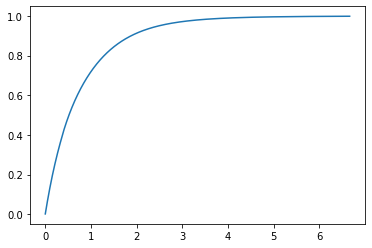

In [59]:
import numpy as np
y=np.arange(0.001,1,0.001)
x=np.zeros(len(y))
for i,a in enumerate(y):  
    x[i]=calc_J_inv(a)
    
import matplotlib.pyplot as plt
plt.plot(x, y)

In [56]:
with open("BPSK_MI",'w') as f: 
        for i in range(len(x)):
            print(str(x[i]),str(y[i]),file=f)